#抓取股票資料

## 月營收資料

In [0]:
!pip install fbprophet 
!pip install fix-yahoo-finance

In [0]:
import requests
import pandas as pd
import numpy as np
import datetime 
from bs4 import BeautifulSoup
import lxml
from io import StringIO
import time
import threading
import json
import random
from fbprophet import Prophet
import fix_yahoo_finance as yf
from datetime import timedelta
import pandas_datareader as pdr
yf.pdr_override()

In [0]:
#抓取月營收資料
def Monthly_revenue_Crawler(year,month):
    url='http://mops.twse.com.tw/nas/t21/sii/t21sc03_'+year+'_'+month+'_0.html'
    req = requests.get(url)
    req.encoding = 'big5'
    # 檢查HTTP Status
    if req.status_code != requests.codes.ok:
      print("FetchError"+req.status_code)
      return r.status_code
    else:
      soup = BeautifulSoup(req.text,'html.parser') 
      df_arr=[]
      table=[]
      html_df=[]
      for i in soup.find_all("table"):
        if i.find("table") != None:
          for t in range(len(i.find_all("table"))):
            table.append(i.find_all("table")[t])
      
      for t in table:
        html_table= pd.read_html(str(t))[0]
        if len(html_table)!=1:
          #print(html_table)
          html_df.append(html_table)
      #print(html_df[0])
      html_df.remove(html_df[0])
      df=pd.concat(html_df,axis=0)
      df.columns = df.columns.droplevel(0)
      df=df.drop(index=df[df['公司代號']=='合計'].index)

    return df

In [0]:
#抓取前cnt月的月營收資料
def Fetch_Monthly_revenue(cnt):
  count = cnt
  year =  datetime.datetime.now().year-1911
  month =  datetime.datetime.now().month-1
  result = {}
  while len(result) < count:
      result['%d-%d'%(year, month)] = Monthly_revenue_Crawler(str(year), str(month))

      month -=1
      if month == 0:
          year -=1
          month = 12
          
      time.sleep(5)
  return result

In [0]:
'''
result=Fetch_Monthly_revenue(10)
#print(result)
for key in result.keys():
  #print(result[key]['公司代號'])
  result[key].index = result[key]['公司代號']

obj={}
for index,df in result.items():
  obj[index]=df['當月營收']

df = pd.DataFrame.from_dict(obj,orient='index')
df = df.sort_index()
df
'''

,1201,1203,1210,1213,1215,1217,1220,1225,1232,1235,...,1104,1108,1110,6531,6166,6230,6579,8114,6278,3593
107-10,1772387,515554,6123232,36069,1871127,244422,250718,932581,1463517,3281,...,457241,300242,177767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107-11,1633866,506912,6735632,26745,1765886,269672,280415,1029697,1466021,2042,...,421815,269955,138622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107-12,1536834,521085,6339590,29860,1791014,269710,270544,936366,1463270,2236,...,465496,300034,183634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107-7,1899582,476840,6059127,87390,1898449,478884,225840,958539,1432128,3400,...,350896,264328,157245,403904.0,891612.0,700464.0,504334.0,846150.0,2730351.0,75656.0
107-8,1927383,571897,6280981,85863,1918613,668101,273493,985283,1441081,27967,...,354949,255469,98994,389919.0,842099.0,693975.0,583701.0,791595.0,2917566.0,78915.0
107-9,1857221,520954,6405654,36194,1769540,417077,238953,937936,1300638,5225,...,415742,256381,127730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108-1,1583493,544108,7176513,63426,1885469,379511,261737,964100,1620137,1752,...,479518,353189,186293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108-2,1358770,443171,4971488,39925,1463626,303197,143511,633413,1101574,1114,...,270638,168065,82927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108-3,1598137,514903,6130106,29047,1686202,313572,208035,880257,1437562,1830,...,437140,313093,147819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108-4,1695994,469207,6424220,28570,1739496,287677,209667,889193,1328619,2555,...,418992,323834,118229,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##財報資料

In [0]:
# 抓取財報資料函數
def fetch_financial_statements(year, season):
   # 查詢網址
    url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb06'
    
    # 查詢參數
    my_params = {
        'encodeURIComponent':1,
        'step':1,
        'firstin':1,
        'off':1,
        'isQuery': 'Y',
        'TYPEK':'sii',
        'year':str(year),
        'season':str(season)
    }
    req = requests.post(url,params = my_params)
    
    # 檢查HTTP Status
    if req.status_code != requests.codes.ok:
      print("FetchError"+req.status_code)
      return r.status_code
    else:
      soup = BeautifulSoup(req.text, "lxml") 
      table=soup.find("table", class_= "hasBorder")
      df = pd.read_html(str(table))[0]
      #print(df[1])
      #print(df.columns)
      #print(df.loc[0])
      df.columns=df.loc[0]
      df=df.drop([0])
      #print(df)
      df=df.drop(index=df[df['公司代號']=='公司代號'].index)
      #print(df)
      return df

In [0]:
# 抓取至今前三年各季財報資料

# 抓取今年及季
year_AD=datetime.datetime.today().strftime("%Y")
season_now=datetime.datetime.today().strftime("%m-%d")

# 第一季 5 月 16 日更新，半年度 8 月 15 日更新，第三季 11 月 15 日更新，年度 4 月 1 日更新。
if(season_now<"05-16"):
  season_now=0
elif(season_now<"08-05"):
  season_now=1
elif(season_now<"11-16"):
  season_now=2
elif(season_now>="11-16"):
  season_now=3
else:
  season_now=0
  
# 轉換成民國年份
year =int(year_AD)-1911;

result = {} 

# 逐年逐季抓取資料
for yr in range(3):
  y=year-yr
  for season in range(4):
    s=season+1
    if(y!=year):
      result['%d-%d'%(y,s)] = fetch_financial_statements(y, s)
    else:
      if(s<season):
        result['%d-%d'%(y,s)] = fetch_financial_statements(y, s)
    time.sleep(10)
        

for key in result.keys():
  result[key].index = result[key]['公司代號']
 

obj={}


##過去基本面(過去八季)篩選

1.   毛利率>0
2.   營收利益率>0
3.   稅前利益率>0
4.   稅後利益率>0
5.   稅前利益率/營收利益率 (本業營收)>0.6


In [0]:
#篩選近幾季毛利率 營業利益率 稅前純益率 稅後純益率 >0 超過六年的股票
#篩選近幾季本業收益 >0.6 超過七年的股票
df_1 = pd.DataFrame.from_dict(obj,orient='index')
for col in df_1.columns:
  df_1[col] = pd.to_numeric(df_1[col],errors='coerce')
  df_1[col]=df_1[df_1[col]>0]
  if pd.isnull(df_1[col]).sum() > 2:
    df_1=df_1.drop(col, axis = 1)
df_1= df_1.sort_index()
print(df_1)

obj={}
for index,df in result.items():
  obj[index]=df['營業利益率(%)(營業利益)/(營業收入)']
df_2 = pd.DataFrame.from_dict(obj,orient='index')
for col in df_2.columns:
  df_2[col] = pd.to_numeric(df_2[col],errors='coerce')
  df_2[col]=df_2[df_2[col]>0]
  if pd.isnull(df_2[col]).sum() > 2:
    df_2=df_2.drop(col, axis = 1)

df_2= df_2.sort_index()
print(df_2)

for index,df in result.items():
  obj[index]=df['稅前純益率(%)(稅前純益)/(營業收入)']
df_3 = pd.DataFrame.from_dict(obj,orient='index')
for col in df_3.columns:
  df_3[col] = pd.to_numeric(df_3[col],errors='coerce')
  df_3[col]=df_3[df_3[col]>0]
  if pd.isnull(df_3[col]).sum() > 2:
    df_3=df_3.drop(col, axis = 1)

df_3= df_3.sort_index()
print(df_3)

for index,df in result.items():
  obj[index]=df['稅後純益率(%)(稅後純益)/(營業收入)']
df_4 = pd.DataFrame.from_dict(obj,orient='index')
for col in df_4.columns:
  df_4[col] = pd.to_numeric(df_4[col],errors='coerce')
  df_4[col]=df_4[df_4[col]>0]
  if pd.isnull(df_4[col]).sum() > 2:
    df_4=df_4.drop(col, axis = 1)

df_4= df_4.sort_index()
print(df_4)



for index,df in result.items():
  obj[index]=pd.to_numeric(df['營業利益率(%)(營業利益)/(營業收入)'],errors='coerce')/pd.to_numeric(df['稅前純益率(%)(稅前純益)/(營業收入)'],errors='coerce')
df_5 = pd.DataFrame.from_dict(obj,orient='index')
for col in df_5.columns:
  df_5[col] = pd.to_numeric(df_5[col],errors='coerce')
  df_5[col]=df_5[df_5[col]>0.6]
  if pd.isnull(df_5[col]).sum() > 1:
    df_5=df_5.drop(col, axis = 1)

df_5= df_5.sort_index()
print(df_5)

           1101      1102      1104  ...      9946      9955      9958
106-1  1.159292  1.159292  1.159292  ...  1.159292  1.159292  1.159292
106-2  1.043062  1.043062  1.043062  ...  1.043062  1.043062  1.043062
106-3  1.002242  1.002242  1.002242  ...  1.002242  1.002242       NaN
106-4  1.009957  1.009957  1.009957  ...  1.009957  1.009957  1.009957
107-1  1.006806  1.006806  1.006806  ...  1.006806  1.006806  1.006806
107-2  0.943847  0.943847  0.943847  ...  0.943847  0.943847  0.943847
107-3  0.921260  0.921260  0.921260  ...  0.921260  0.921260  0.921260
107-4  0.922512  0.922512  0.922512  ...  0.922512  0.922512  0.922512

[8 rows x 801 columns]
        1101   1102   1104   1109   1203  ...   9943   9944   9945   9946   9958
106-1   9.17   9.17   9.17   9.17   9.17  ...   9.17   9.17   9.17   9.17   9.17
106-2  13.08  13.08  13.08  13.08  13.08  ...  13.08  13.08  13.08  13.08  13.08
106-3  13.41  13.41  13.41  13.41  13.41  ...  13.41  13.41  13.41  13.41    NaN
106-4   14.2 

In [0]:
df_com = pd.concat([df_1,df_2,df_3,df_4,df_5], axis = 0, join='inner', keys=(['毛利率','營業利益率','稅前純益率','稅後純益率','本業收益']))
df_com

1101      1102      1109  ...      9942      9943      9946
毛利率   106-1   1.15929   1.15929   1.15929  ...   1.15929   1.15929   1.15929
      106-2   1.04306   1.04306   1.04306  ...   1.04306   1.04306   1.04306
      106-3   1.00224   1.00224   1.00224  ...   1.00224   1.00224   1.00224
      106-4   1.00996   1.00996   1.00996  ...   1.00996   1.00996   1.00996
      107-1   1.00681   1.00681   1.00681  ...   1.00681   1.00681   1.00681
      107-2  0.943847  0.943847  0.943847  ...  0.943847  0.943847  0.943847
      107-3   0.92126   0.92126   0.92126  ...   0.92126   0.92126   0.92126
      107-4  0.922512  0.922512  0.922512  ...  0.922512  0.922512  0.922512
營業利益率 106-1      9.17      9.17      9.17  ...      9.17      9.17      9.17
      106-2     13.08     13.08     13.08  ...     13.08     13.08     13.08
      106-3     13.41     13.41     13.41  ...     13.41     13.41     13.41
      106-4      14.2      14.2      14.2  ...      14.2      14.2      14.2
      107-1     19.23     19.23     19.23  ...     19.23     19.23     19.23
      107-2      23.7      23.7      23.7  ...      23.7      23.7      23.7
      107-3      23.4      23.4      23.4  ...      23.4      23.4      23.4
      107-4     22.62     22.62     22.62  ...     22.62     22.62     22.62
稅前純益率 106-1      7.91      7.91      7.91  ...      7.91      7.91      7.91
      106-2     12.54     12.54     12.54  ...     12.54     12.54     12.54
      106-3     13.38     13.38     13.38  ...     13.38     13.38     13.38
      106-4     14.06     14.06     14.06  ...     14.06     14.06     14.06
      107-1      19.1      19.1      19.1  ...      19.1      19.1      19.1
      107-2     25.11     25.11     25.11  ...     25.11     25.11     25.11
      107-3      25.4      25.4      25.4  ...      25.4      25.4      25.4
      107-4     24.52     24.52     24.52  ...     24.52     24.52     24.52
稅後純益率 106-1      5.49      5.49      5.49  ...      5.49      5.49      5.49
      106-2      9.23      9.23      9.23  ...      9.23      9.23      9.23
      106-3     10.04     10.04     10.04  ...     10.04     10.04     10.04
      106-4      10.5      10.5      10.5  ...      10.5      10.5      10.5
      107-1     11.85     11.85     11.85  ...     11.85     11.85     11.85
      107-2     18.39     18.39     18.39  ...     18.39     18.39     18.39
      107-3        19        19        19  ...        19        19        19
      107-4     18.17     18.17     18.17  ...     18.17     18.17     18.17
本業收益  106-1   1.15929   1.15929   1.15929  ...   1.15929   1.15929   1.15929
      106-2   1.04306   1.04306   1.04306  ...   1.04306   1.04306   1.04306
      106-3   1.00224   1.00224   1.00224  ...   1.00224   1.00224   1.00224
      106-4   1.00996   1.00996   1.00996  ...   1.00996   1.00996   1.00996
      107-1   1.00681   1.00681   1.00681  ...   1.00681   1.00681   1.00681
      107-2  0.943847  0.943847  0.943847  ...  0.943847  0.943847  0.943847
      107-3   0.92126   0.92126   0.92126  ...   0.92126   0.92126   0.92126
      107-4  0.922512  0.922512  0.922512  ...  0.922512  0.922512  0.922512

[40 rows x 462 columns]

In [0]:
global df_com_2
df_com_2=df_com
stocks=df_com_2.columns.tolist()
stocks

['1101',
 '1102',
 '1109',
 '1203',
 '1210',
 '1215',
 '1216',
 '1220',
 '1225',
 '1227',
 '1231',
 '1232',
 '1233',
 '1256',
 '1304',
 '1305',
 '1307',
 '1309',
 '1310',
 '1313',
 '1319',
 '1323',
 '1325',
 '1338',
 '1339',
 '1340',
 '1402',
 '1410',
 '1413',
 '1436',
 '1437',
 '1442',
 '1452',
 '1460',
 '1463',
 '1464',
 '1470',
 '1474',
 '1476',
 '1477',
 '1503',
 '1504',
 '1507',
 '1513',
 '1514',
 '1521',
 '1522',
 '1524',
 '1526',
 '1528',
 '1530',
 '1531',
 '1532',
 '1536',
 '1537',
 '1539',
 '1560',
 '1568',
 '1582',
 '1583',
 '1590',
 '1605',
 '1614',
 '1615',
 '1617',
 '1701',
 '1702',
 '1707',
 '1708',
 '1709',
 '1710',
 '1711',
 '1712',
 '1714',
 '1717',
 '1720',
 '1723',
 '1724',
 '1725',
 '1726',
 '1727',
 '1730',
 '1731',
 '1732',
 '1733',
 '1735',
 '1737',
 '1760',
 '1773',
 '1783',
 '1789',
 '1802',
 '1808',
 '1817',
 '1905',
 '1907',
 '1909',
 '2002',
 '2006',
 '2010',
 '2012',
 '2014',
 '2015',
 '2017',
 '2023',
 '2024',
 '2027',
 '2028',
 '2029',
 '2030',
 '2032',
 

##籌碼面/現金流/成長分析


1.   年成長率>0
2.   近一年/近一季營運現金流>0
3.   董監持股>10(%)



In [0]:
def fetch_NOW(stock):
  global df_com_2
  #查詢網址
  url = 'http://mops.twse.com.tw/mops/web/t146sb05'
  #查詢參數
  data = {
  'step': '1',
  'firstin': '1',
  'off': '1',
  'queryName': 'co_id',
  'inpuType': 'co_id',
  'TYPEK': 'all',
  'isnew': 'true',
  'co_id': stock
   }
                                    
  headers = {
  'Host': 'mops.twse.com.tw',
  'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'         
  }
  
  list_req = requests.post(url, data=data ,headers=headers)
  soup = BeautifulSoup(list_req.content, "html.parser")
  tables=soup.find('div',id='table01').find_all('table')
  revenue= pd.read_html(str(tables[2]))[0]
  #抓取至今比對去年整年的年成長率
  revenue=revenue[2][1][:-1]
  #print(revenue)
  if float(revenue) < 0:
    print(stock+' revenue:'+revenue)
    df_com_2=df_com_2.drop(stock,axis=1)
    return
  #抓取營運現金流
  CashFlow=pd.read_html(str(tables[3]))[0]
  
  if(int(CashFlow[2][9])<0 & int(CashFlow[4][9])<0):
    print(stock+' CashFlow:'+CashFlow)
    df_com_2=df_com_2.drop(stock,axis=1)
    return
  #抓取董監持股比例
  chairman=pd.read_html(str(tables[5]))[0]
  chairman=chairman[3][1][:-1]
  if float(chairman)<10:
    print(stock+' chairman:'+chairman)
    df_com_2=df_com_2.drop(stock,axis=1)
    return
  time.sleep(5)


In [0]:
 #檢查 年成長率 營運現金流 董監事持股比例
threads = []
i=0
for stock in stocks:
  threads.append(threading.Thread(target = fetch_NOW(stock)))
  threads[i].start()
  i+=1
for j in range(len(stocks)):
  threads[j].join()

print("Done.")
  

                                            


1225 revenue:-8.80
1232 revenue:-0.40
1304 revenue:-6.93
1305 revenue:-12.09
1309 revenue:-8.55
1310 revenue:-24.57
1319 revenue:-12.26
1325 revenue:-9.92
1338 revenue:-12.92
1339 revenue:-8.07
1340 revenue:-38.73
1410 revenue:-22.00
1436 revenue:-30.09
1442 revenue:-65.82
1460 revenue:-4.30
1463 revenue:-48.32
1476 revenue:-6.85
1504 revenue:-7.40
1507 revenue:-22.65
1513 revenue:-0.95
1521 revenue:-10.10
1526 revenue:-12.91
1528 revenue:-27.46
1530 revenue:-28.41
1532 revenue:-0.20
1536 revenue:-16.13
1539 revenue:-12.14
1568 revenue:-35.92
1582 chairman:9.92
1583 revenue:-27.93
1590 revenue:-2.22
1605 revenue:-27.51
1615 revenue:-23.03
1617 revenue:-19.85
1702 revenue:-0.91
1708 revenue:-9.46
1709 revenue:-15.25
1710 revenue:-19.29
1714 revenue:-3.73
1717 revenue:-6.78
1723 revenue:-1.40
1724 revenue:-6.79
1725 revenue:-9.73
1726 revenue:-9.05
1727 revenue:-17.45
1735 revenue:-17.54
1773 revenue:-6.57
1783 revenue:-8.75
1789 revenue:-21.68
1802 revenue:-18.09
1808 revenue:-81.39
181

ConnectionError: ignored

In [0]:
stocks=df_com_2.columns.tolist()
stocks


['1101',
 '1102',
 '1109',
 '1203',
 '1210',
 '1215',
 '1216',
 '1220',
 '1227',
 '1231',
 '1233',
 '1256',
 '1307',
 '1313',
 '1323',
 '1402',
 '1413',
 '1437',
 '1452',
 '1464',
 '1470',
 '1474',
 '1477',
 '1503',
 '1514',
 '1522',
 '1524',
 '1531',
 '1537',
 '1560',
 '1614',
 '1701',
 '1707',
 '1711',
 '1712',
 '1720',
 '1730',
 '1731',
 '1732',
 '1733',
 '1737',
 '1760',
 '2002',
 '2006',
 '2014',
 '2015',
 '2033',
 '2101',
 '2103',
 '2104',
 '2108',
 '2115',
 '2228',
 '2239',
 '2308',
 '2317',
 '2356',
 '2382',
 '2385',
 '2395',
 '2397',
 '2404',
 '2414',
 '2415',
 '2423',
 '2433',
 '2456',
 '2468',
 '2480',
 '2488',
 '2492',
 '2493',
 '2511',
 '2515',
 '2524',
 '2539',
 '2540',
 '2545',
 '2546',
 '2597',
 '2601',
 '2607',
 '2608',
 '2618',
 '2633',
 '2634',
 '2636',
 '2637',
 '2748',
 '2816',
 '2823',
 '2832',
 '2850',
 '2851',
 '2904',
 '2906',
 '2912',
 '3003',
 '3004',
 '3005',
 '3008',
 '3010',
 '3016',
 '3017',
 '3019',
 '3021',
 '3029',
 '3035',
 '3130',
 '3209',
 '3376',
 

##本益比/現金殖利率/股價淨值比分析


1.   本益比>15
2.   現金殖利率>5(%)
3.   股價淨值比>0.8



In [0]:
def fetch_PE(stock):
  global df_com_2
  today=datetime.datetime.today().strftime("%Y%m%d")
  time.sleep(random.randint(5,30))
  #查詢網址
  url = 'http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=' + str(today)+'&stockNo='+stock+'&_=1558069704481'
  #print(url)
  list_req = requests.get(url)
  soup = BeautifulSoup(list_req.content, "html.parser")
  getjson=json.loads(soup.text)
  #print(getjson['data'])
  stockdf = pd.DataFrame(getjson['data'],columns=["日期","殖利率(%)","股利年度","本益比","股價淨值比","財報年/季"])
  length=len(stockdf)
  #print(pd.to_numeric(stockdf['股價淨值比'][length-1], errors='coerce'))
  #排除股價淨值比大於1.2
  if pd.to_numeric(stockdf['股價淨值比'][length-1], errors='coerce') >1.2 :
    print(stock+' PBR:'+stockdf['股價淨值比'][length-1])
    df_com_2=df_com_2.drop(stock,axis=1)
    return
  #排除本益比大於16
  if pd.to_numeric(stockdf['本益比'][length-1], errors='coerce') > 16 :
    print(stock+' PE:'+stockdf['本益比'][length-1])
    df_com_2=df_com_2.drop(stock,axis=1)
    return
  #排除殖利率小於5
  if pd.to_numeric(stockdf['殖利率(%)'][length-1], errors='coerce') <5:
    print(stock+' EPS2:'+stockdf['殖利率(%)'][length-1])
    df_com_2=df_com_2.drop(stock,axis=1)
    return

 

In [0]:
i=0
threads=[]
for stock in stocks:
  threads.append(threading.Thread(target = fetch_PE(stock)))
  threads[i].start()
  time.sleep(2)
  i+=1
for j in range(len(stocks)):
  threads[j].join()

print("Done.")
  

http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=20190521&stockNo=1101&_=1558069704481
1101 EPS:10.13
http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=20190521&stockNo=1102&_=1558069704481
1102 EPS:12.19
http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=20190521&stockNo=1109&_=1558069704481
1109 EPS:6.96
http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=20190521&stockNo=1203&_=1558069704481
1203 EPS:12.96
http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=20190521&stockNo=1210&_=1558069704481
http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=20190521&stockNo=1215&_=1558069704481
1215 EPS2:4.49
http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=20190521&stockNo=1216&_=1558069704481
1216 EPS2:3.13
http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=20190521&stockNo=1220&_=1558069704481
1220 EPS2:4.18
http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=20190521&stockNo

In [0]:
stocks=df_com_2.columns.tolist()
stocks

['1210',
 '1402',
 '1464',
 '2006',
 '2397',
 '2415',
 '3130',
 '3705',
 '4989',
 '5285',
 '6271',
 '6281',
 '6464',
 '8039',
 '8422',
 '8473',
 '9925',
 '9941']

##加入自選股

In [0]:
self_stocks=['3231','2887']
for stock in self_stocks:
  if stock not in stocks:
      stocks.append(stock)

##下載股價資料

In [0]:
#抓取股票歷史股價資料
def stock_price_crawler(code,starttime,endtime):

  result={}
  #start=datetime.datetime.strptime(starttime,'%Y%m%d')
  #end=datetime.datetime.strptime(endtime,'%Y%m%d')
  for no in code:
    #print(no)
    result[no[:-3]]=pdr.get_data_yahoo(no, starttime, endtime)
    
    #result[no[:-3]]
  return result

In [0]:
#抓取過去70天的股價資料
start = datetime.datetime.today()-timedelta(days=70)+ timedelta(hours=8) 
end=datetime.datetime.today()+ timedelta(hours=8) 
result=stock_price_crawler(stocks,start,end)

obj={}
for index,df in result.items():
  obj[index]=df['Close']

  
df = pd.DataFrame.from_dict(obj,orient='index')
df = df.sort_index()
df

1210.tw
1402.tw
1464.tw
2006.tw
2397.tw
2415.tw
3130.tw
3705.tw
4989.tw
5285.tw
6271.tw
6281.tw
6464.tw
8039.tw
8422.tw
8473.tw
9925.tw
9941.tw


,2019-04-08 00:00:00,2019-04-09 00:00:00,2019-04-10 00:00:00,2019-04-11 00:00:00,2019-04-12 00:00:00,2019-04-15 00:00:00,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-19 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-29 00:00:00,2019-04-30 00:00:00,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00,2019-05-13 00:00:00,2019-05-14 00:00:00,2019-05-15 00:00:00,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-20 00:00:00,2019-05-21 00:00:00,2019-05-22 00:00:00
1210,35.049999,35.299999,35.299999,35.349998,35.200001,35.200001,35.000000,35.150002,34.950001,35.099998,35.900002,36.049999,36.000000,35.599998,35.099998,35.400002,35.099998,35.250000,35.299999,35.200001,35.700001,35.950001,35.400002,35.450001,36.450001,36.450001,36.500000,36.049999,37.500000,38.150002,38.299999,38.200001
1402,32.099998,32.500000,32.599998,32.299999,32.549999,32.599998,32.599998,32.650002,31.799999,31.950001,32.450001,32.599998,32.700001,32.650002,33.250000,33.650002,33.700001,32.849998,33.200001,32.650002,32.799999,32.849998,32.549999,31.950001,31.700001,31.500000,31.600000,31.750000,31.750000,32.599998,32.049999,31.549999
1464,21.150000,21.350000,23.200001,23.000000,22.900000,23.299999,23.000000,22.900000,22.299999,22.549999,22.950001,22.950001,22.750000,22.950001,22.850000,22.799999,22.900000,23.150000,23.000000,22.900000,23.200001,23.000000,22.799999,22.500000,22.500000,22.650000,23.200001,23.150000,23.450001,24.799999,24.350000,24.500000
2006,21.299999,21.900000,21.950001,22.150000,22.049999,22.000000,22.000000,21.900000,21.850000,22.000000,21.750000,21.600000,21.650000,21.549999,21.650000,21.900000,22.100000,22.100000,22.250000,22.250000,22.350000,22.450001,22.150000,22.150000,21.750000,22.250000,22.200001,22.100000,22.000000,22.100000,22.350000,22.450001
2397,79.900002,79.900002,80.199997,80.000000,79.199997,79.000000,78.699997,78.800003,78.400002,78.400002,78.500000,78.900002,79.199997,79.500000,78.000000,77.699997,78.599998,79.300003,79.500000,79.900002,79.699997,79.699997,79.800003,79.500000,79.900002,79.000000,80.400002,79.199997,80.000000,87.900002,90.300003,91.800003
2415,24.600000,24.200001,24.200001,23.750000,23.400000,24.400000,24.350000,24.400000,23.799999,23.750000,23.950001,23.750000,23.799999,23.750000,23.350000,23.049999,23.200001,23.250000,23.299999,22.799999,22.850000,23.049999,22.700001,22.400000,21.450001,21.950001,22.650000,22.450001,22.000000,21.750000,22.049999,22.200001
3130,169.500000,170.000000,170.500000,171.000000,171.000000,171.500000,172.000000,173.000000,172.500000,169.000000,170.000000,171.000000,170.000000,170.000000,168.500000,170.000000,170.500000,170.000000,170.000000,166.000000,165.000000,166.000000,166.000000,167.000000,167.000000,168.000000,169.000000,169.500000,169.500000,170.000000,171.000000,NaN
3705,41.900002,42.000000,42.150002,42.099998,42.049999,42.150002,41.950001,42.200001,42.049999,42.000000,42.049999,42.099998,42.000000,41.950001,42.049999,42.049999,42.099998,42.150002,42.200001,42.099998,42.000000,41.950001,41.950001,41.950001,41.799999,41.750000,42.299999,42.049999,41.900002,41.849998,42.450001,42.650002
4989,29.150000,29.400000,28.900000,28.150000,27.549999,27.750000,28.200001,27.799999,26.700001,28.100000,28.549999,28.000000,27.799999,27.700001,27.100000,26.500000,26.600000,26.950001,28.250000,27.299999,27.400000,27.299999,26.600000,26.200001,25.400000,25.600000,25.850000,24.900000,24.299999,23.799999,24.299999,24.600000
5285,68.800003,68.800003,69.400002,69.000000,68.599998,68.900002,68.900002,68.800003,68.400002,68.599998,68.800003,68.099998,68.300003,66.900002,65.800003,65.500000,65.500000,65.699997,65.800003,65.500000,66.699997,66.000000,65.800003,65.800003,65.199997,65.199997,65.300003,65.199997,64.300003,63.599998,63.599998,NaN


##買賣訊號


1.   MA20<股價
2.   MA50<股價
3.   MA20<MA10



In [0]:
df["MA50"]=df.iloc[:, -50:].mean(axis=1)
df["MA20"]=df.iloc[:, -10:-1].mean(axis=1)
df["MA10"]=df.iloc[:, -10:-2].mean(axis=1)


In [0]:
df

,2019-04-08 00:00:00,2019-04-09 00:00:00,2019-04-10 00:00:00,2019-04-11 00:00:00,2019-04-12 00:00:00,2019-04-15 00:00:00,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-19 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-29 00:00:00,2019-04-30 00:00:00,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00,2019-05-13 00:00:00,2019-05-14 00:00:00,2019-05-15 00:00:00,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-20 00:00:00,2019-05-21 00:00:00,2019-05-22 00:00:00,MA20,MA10
1210,35.049999,35.299999,35.299999,35.349998,35.200001,35.200001,35.000000,35.150002,34.950001,35.099998,35.900002,36.049999,36.000000,35.599998,35.099998,35.400002,35.099998,35.250000,35.299999,35.200001,35.700001,35.950001,35.400002,35.450001,36.450001,36.450001,36.500000,36.049999,37.500000,38.150002,38.299999,38.200001,36.160526,37.005556
1402,32.099998,32.500000,32.599998,32.299999,32.549999,32.599998,32.599998,32.650002,31.799999,31.950001,32.450001,32.599998,32.700001,32.650002,33.250000,33.650002,33.700001,32.849998,33.200001,32.650002,32.799999,32.849998,32.549999,31.950001,31.700001,31.500000,31.600000,31.750000,31.750000,32.599998,32.049999,31.549999,32.452632,31.827778
1464,21.150000,21.350000,23.200001,23.000000,22.900000,23.299999,23.000000,22.900000,22.299999,22.549999,22.950001,22.950001,22.750000,22.950001,22.850000,22.799999,22.900000,23.150000,23.000000,22.900000,23.200001,23.000000,22.799999,22.500000,22.500000,22.650000,23.200001,23.150000,23.450001,24.799999,24.350000,24.500000,23.192105,23.455556
2006,21.299999,21.900000,21.950001,22.150000,22.049999,22.000000,22.000000,21.900000,21.850000,22.000000,21.750000,21.600000,21.650000,21.549999,21.650000,21.900000,22.100000,22.100000,22.250000,22.250000,22.350000,22.450001,22.150000,22.150000,21.750000,22.250000,22.200001,22.100000,22.000000,22.100000,22.350000,22.450001,22.110526,22.150000
2397,79.900002,79.900002,80.199997,80.000000,79.199997,79.000000,78.699997,78.800003,78.400002,78.400002,78.500000,78.900002,79.199997,79.500000,78.000000,77.699997,78.599998,79.300003,79.500000,79.900002,79.699997,79.699997,79.800003,79.500000,79.900002,79.000000,80.400002,79.199997,80.000000,87.900002,90.300003,91.800003,81.036842,83.111112
2415,24.600000,24.200001,24.200001,23.750000,23.400000,24.400000,24.350000,24.400000,23.799999,23.750000,23.950001,23.750000,23.799999,23.750000,23.350000,23.049999,23.200001,23.250000,23.299999,22.799999,22.850000,23.049999,22.700001,22.400000,21.450001,21.950001,22.650000,22.450001,22.000000,21.750000,22.049999,22.200001,22.642105,22.100000
3130,169.500000,170.000000,170.500000,171.000000,171.000000,171.500000,172.000000,173.000000,172.500000,169.000000,170.000000,171.000000,170.000000,170.000000,168.500000,170.000000,170.500000,170.000000,170.000000,166.000000,165.000000,166.000000,166.000000,167.000000,167.000000,168.000000,169.000000,169.500000,169.500000,170.000000,171.000000,NaN,168.500000,168.875000
3705,41.900002,42.000000,42.150002,42.099998,42.049999,42.150002,41.950001,42.200001,42.049999,42.000000,42.049999,42.099998,42.000000,41.950001,42.049999,42.049999,42.099998,42.150002,42.200001,42.099998,42.000000,41.950001,41.950001,41.950001,41.799999,41.750000,42.299999,42.049999,41.900002,41.849998,42.450001,42.650002,42.063158,42.077778
4989,29.150000,29.400000,28.900000,28.150000,27.549999,27.750000,28.200001,27.799999,26.700001,28.100000,28.549999,28.000000,27.799999,27.700001,27.100000,26.500000,26.600000,26.950001,28.250000,27.299999,27.400000,27.299999,26.600000,26.200001,25.400000,25.600000,25.850000,24.900000,24.299999,23.799999,24.299999,24.600000,26.139474,24.994444
5285,68.800003,68.800003,69.400002,69.000000,68.599998,68.900002,68.900002,68.800003,68.400002,68.599998,68.800003,68.099998,68.300003,66.900002,65.800003,65.500000,65.500000,65.699997,65.800003,65.500000,66.699997,66

In [0]:
filter1= df["MA50"] < df.iloc[:, -3]
filter2= df["MA20"] < df.iloc[:, -3]
filter3=df["MA20"] < df["MA10"]
df[(filter1&filter2&filter3)]


,2019-04-08 00:00:00,2019-04-09 00:00:00,2019-04-10 00:00:00,2019-04-11 00:00:00,2019-04-12 00:00:00,2019-04-15 00:00:00,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-19 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-29 00:00:00,2019-04-30 00:00:00,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00,2019-05-13 00:00:00,2019-05-14 00:00:00,2019-05-15 00:00:00,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-20 00:00:00,2019-05-21 00:00:00,2019-05-22 00:00:00,MA20,MA10
1210,35.049999,35.299999,35.299999,35.349998,35.200001,35.200001,35.000000,35.150002,34.950001,35.099998,35.900002,36.049999,36.000000,35.599998,35.099998,35.400002,35.099998,35.250000,35.299999,35.200001,35.700001,35.950001,35.400002,35.450001,36.450001,36.450001,36.500000,36.049999,37.500000,38.150002,38.299999,38.200001,36.160526,37.005556
1464,21.150000,21.350000,23.200001,23.000000,22.900000,23.299999,23.000000,22.900000,22.299999,22.549999,22.950001,22.950001,22.750000,22.950001,22.850000,22.799999,22.900000,23.150000,23.000000,22.900000,23.200001,23.000000,22.799999,22.500000,22.500000,22.650000,23.200001,23.150000,23.450001,24.799999,24.350000,24.500000,23.192105,23.455556
2006,21.299999,21.900000,21.950001,22.150000,22.049999,22.000000,22.000000,21.900000,21.850000,22.000000,21.750000,21.600000,21.650000,21.549999,21.650000,21.900000,22.100000,22.100000,22.250000,22.250000,22.350000,22.450001,22.150000,22.150000,21.750000,22.250000,22.200001,22.100000,22.000000,22.100000,22.350000,22.450001,22.110526,22.150000
2397,79.900002,79.900002,80.199997,80.000000,79.199997,79.000000,78.699997,78.800003,78.400002,78.400002,78.500000,78.900002,79.199997,79.500000,78.000000,77.699997,78.599998,79.300003,79.500000,79.900002,79.699997,79.699997,79.800003,79.500000,79.900002,79.000000,80.400002,79.199997,80.000000,87.900002,90.300003,91.800003,81.036842,83.111112
3705,41.900002,42.000000,42.150002,42.099998,42.049999,42.150002,41.950001,42.200001,42.049999,42.000000,42.049999,42.099998,42.000000,41.950001,42.049999,42.049999,42.099998,42.150002,42.200001,42.099998,42.000000,41.950001,41.950001,41.950001,41.799999,41.750000,42.299999,42.049999,41.900002,41.849998,42.450001,42.650002,42.063158,42.077778


In [0]:
stocks=df.index.tolist()

##預測未來趨勢

In [0]:
#抓過去五年的股價資料
start = datetime.datetime.today()-timedelta(days=360*5)+ timedelta(hours=8) 
end=datetime.datetime.today()+ timedelta(hours=8) 
result=stock_price_crawler(stocks,start,end)
obj={}
for index,df in result.items():
  obj[index]=df['Close']

  
df_predict = pd.DataFrame.from_dict(obj,orient='index')
df_predict = df.sort_index()
df_predict

1210.tw
1402.tw
1464.tw
2006.tw
2397.tw
2415.tw
3130.tw
3705.tw
4989.tw
5285.tw
6271.tw
6281.tw
6464.tw
8039.tw
8422.tw
8473.tw
9925.tw
9941.tw


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-06-17,80.900002,79.500000,80.900002,79.500000,418000.0,59.742599
2014-06-18,80.099998,79.099998,79.699997,79.500000,660000.0,59.742599
2014-06-19,79.900002,79.000000,79.599998,79.599998,333000.0,59.817741
2014-06-20,80.099998,79.599998,79.900002,79.900002,269000.0,60.043194
2014-06-23,80.000000,79.000000,80.000000,79.500000,455000.0,59.742599
2014-06-24,80.000000,79.500000,79.900002,79.900002,210000.0,60.043194
2014-06-25,80.000000,79.500000,79.900002,79.900002,230000.0,60.043194
2014-06-26,81.500000,80.400002,80.500000,81.099998,1234000.0,60.944977
2014-06-27,82.900002,81.199997,81.199997,82.000000,1321000.0,61.621304


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

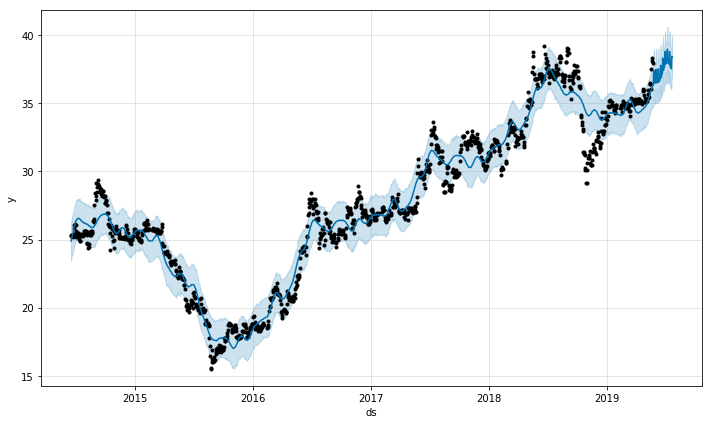

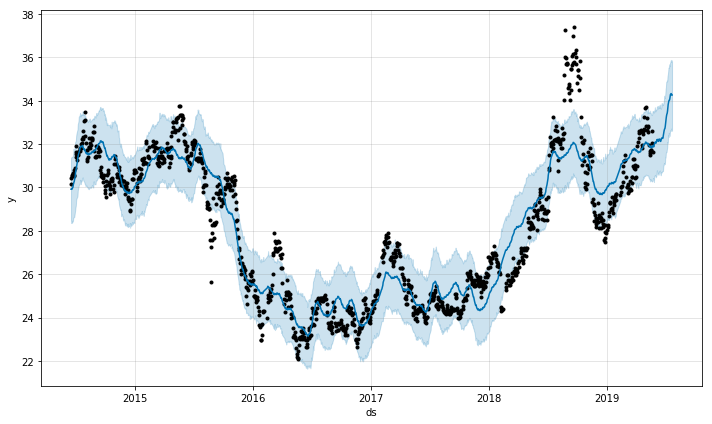

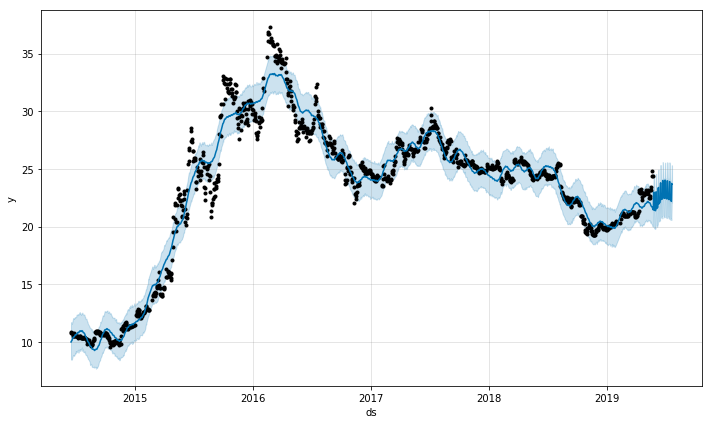

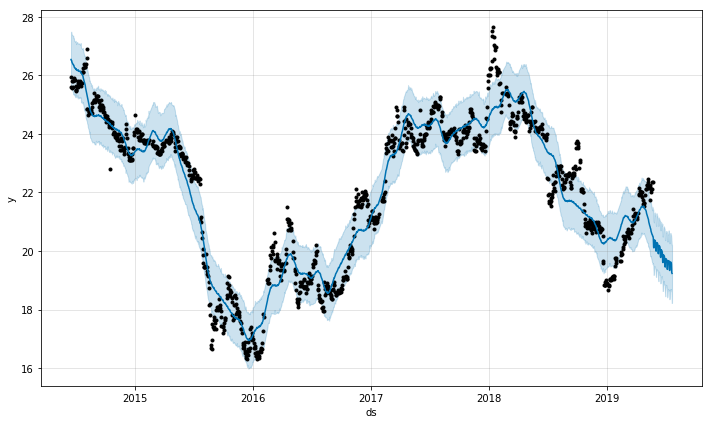

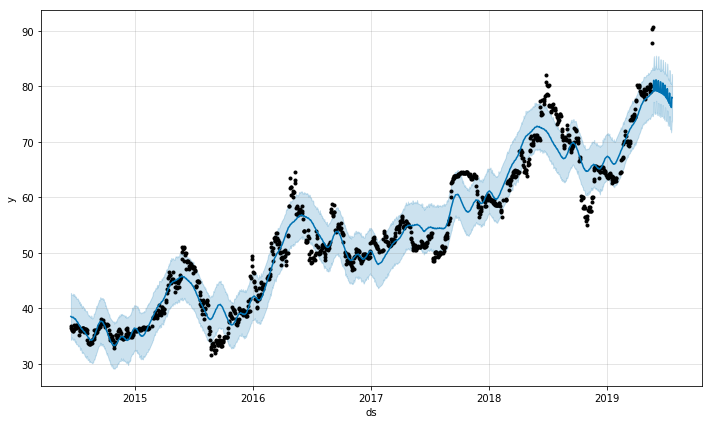

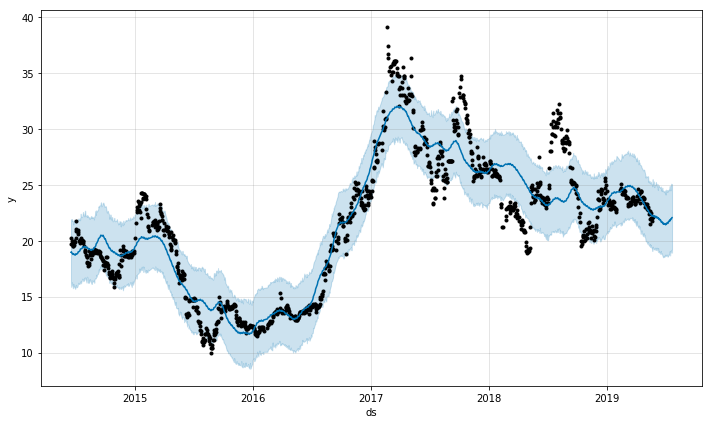

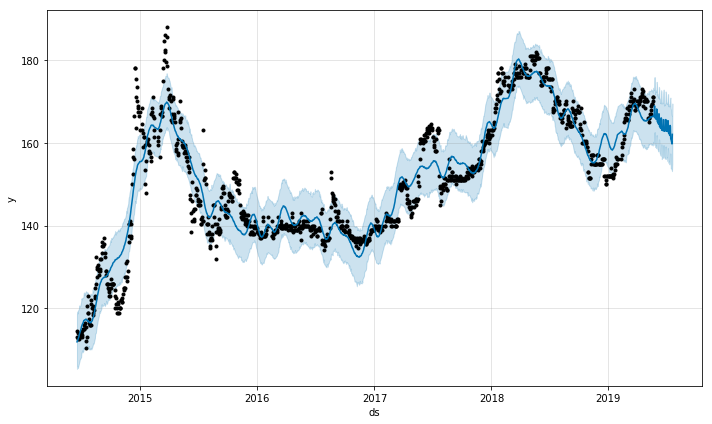

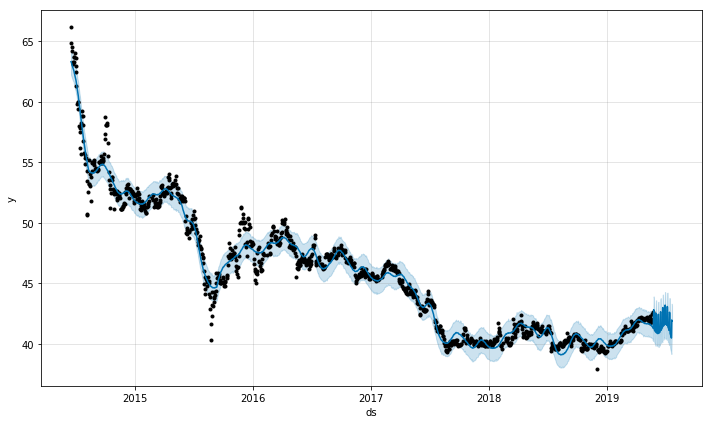

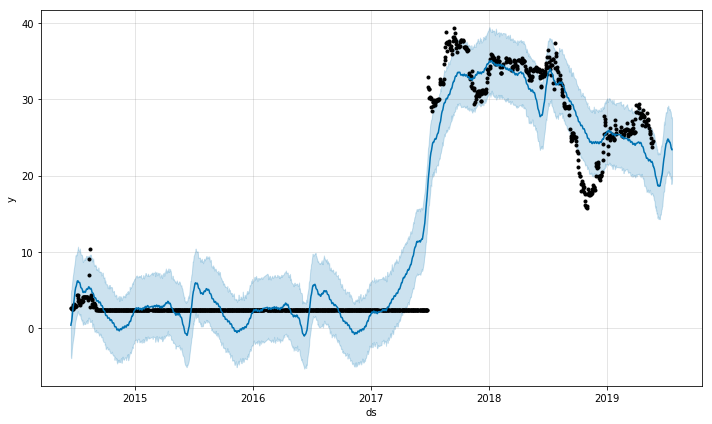

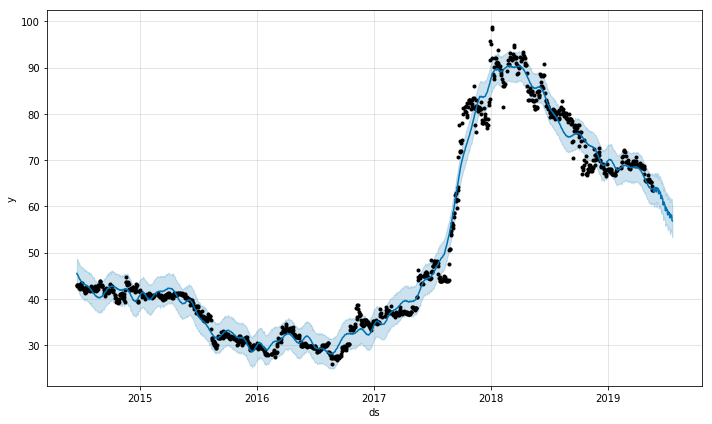

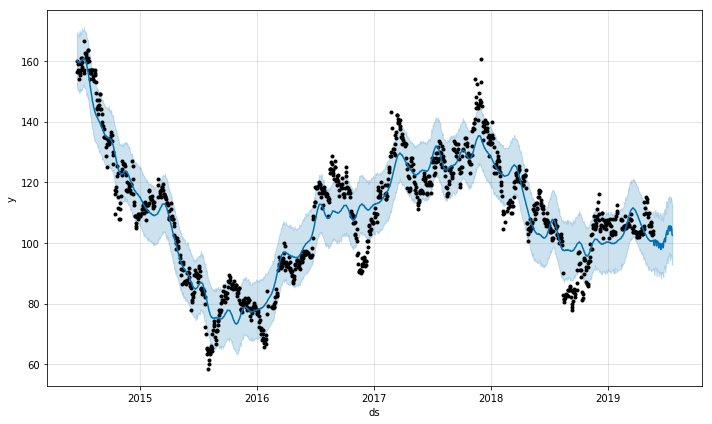

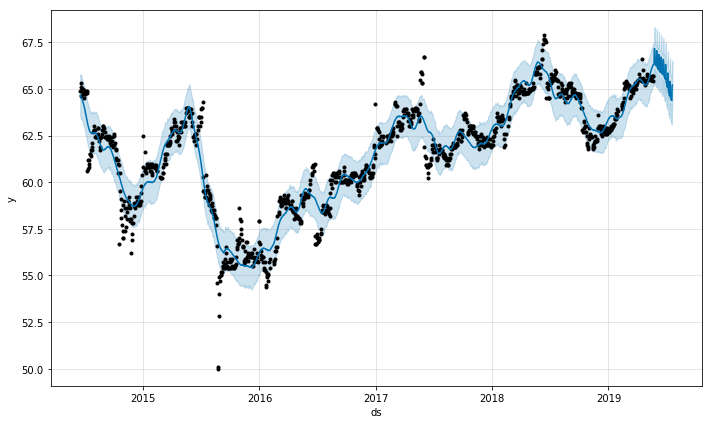

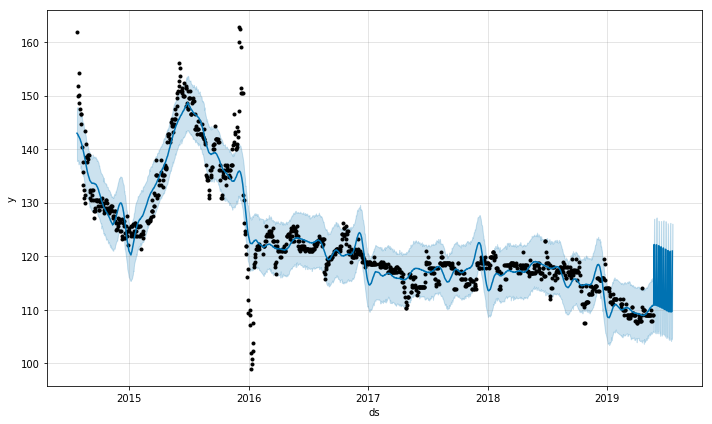

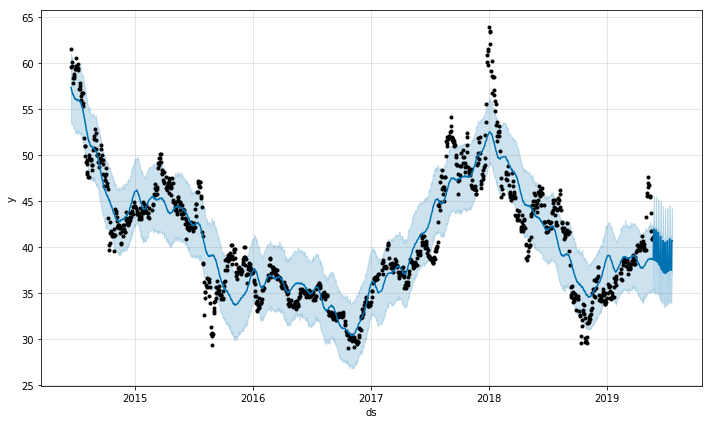

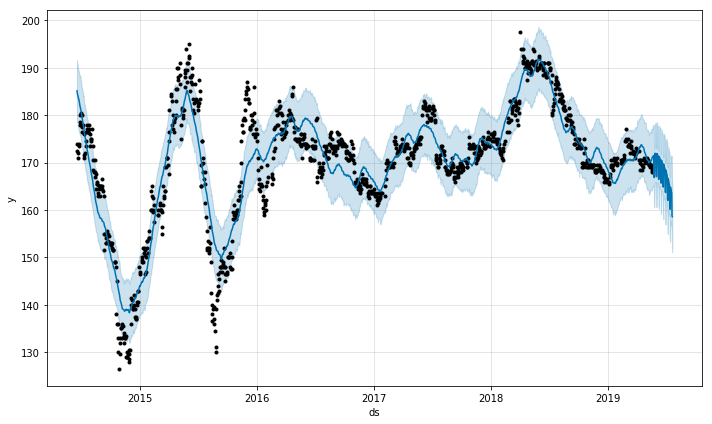

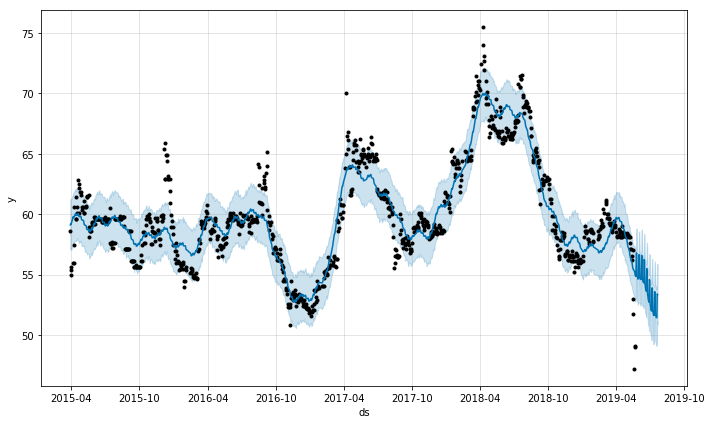

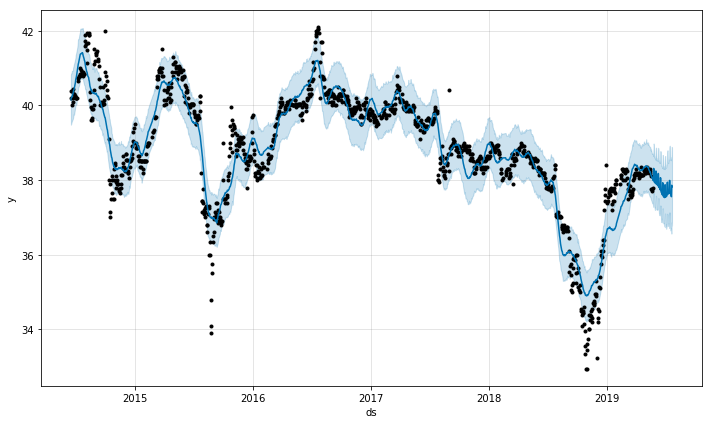

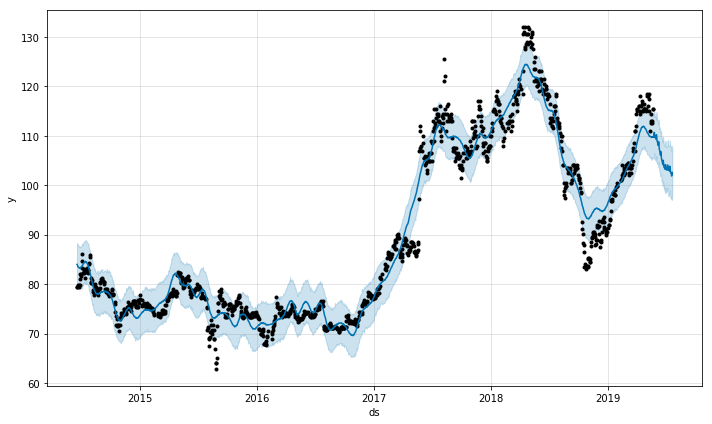

In [0]:
for key in result.keys():
  print(key)
  result[key]=result[key].reset_index()
  price=result[key]
  price.rename(columns={'Close': 'y','Date': 'ds'}, inplace=True)

  model = Prophet()

  #訓練Model
  model.fit(price)
  future = model.make_future_dataframe(periods=120) #(120天)
  #進行預測
  forecast = model.predict(future)

  figure=model.plot(forecast)